# Movie Recommender System

In [55]:
import pandas as pd
import numpy as np

from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

Importing and cleaning dataset

In [6]:
ratings =pd.read_csv('ratings.dat', sep='::', encoding='latin-1', names=['movieId','userId','rating','timestamp'])
movies=pd.read_csv('movies.dat', sep='::', encoding='latin-1', names=['movieId','title','genre'])
movies.drop_duplicates(subset=['title'], inplace=True)
n_movie = len(movies)
to_remove = []
for idx in tqdm(range(n_movie)):
    if movies.movieId.iloc[idx] not in ratings.movieId.unique():
        to_remove.append(movies.movieId.iloc[idx])


C:\Users\mayan\AppData\Local\Temp\ipykernel_4052\1771589325.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ratings =pd.read_csv('ratings.dat', sep='::', encoding='latin-1', names=['movieId','userId','rating','timestamp'])
C:\Users\mayan\AppData\Local\Temp\ipykernel_4052\1771589325.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies=pd.read_csv('movies.dat', sep='::', encoding='latin-1', names=['movieId','title','genre'])


  0%|          | 0/3883 [00:00<?, ?it/s]

In [7]:
movies = movies[~movies.movieId.isin(to_remove)]

n_rate = len(ratings)
to_remove = []
for idx in tqdm(range(n_rate)):
    if ratings.movieId.iloc[idx] not in movies.movieId.unique():
        to_remove.append(ratings.movieId.iloc[idx])

ratings = ratings[~ratings.movieId.isin(to_remove)]
    
movies['new_movieId'] = list(range(movies.movieId.unique().shape[0]))
movies

  0%|          | 0/1000209 [00:00<?, ?it/s]

,movieId,title,genre,new_movieId
0,1,Toy Story (1995),Animation|Children's|Comedy,0
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1
2,3,Grumpier Old Men (1995),Comedy|Romance,2
3,4,Waiting to Exhale (1995),Comedy|Drama,3
4,5,Father of the Bride Part II (1995),Comedy,4
...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,3878
3879,3949,Requiem for a Dream (2000),Drama,3879
3880,3950,Tigerland (2000),Drama,3880
3881,3951,Two Family House (2000),Drama,3881


In [4]:
movies.head()

,movieId,title,genre,new_movieId
0,1,Toy Story (1995),Animation|Children's|Comedy,0
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1
2,3,Grumpier Old Men (1995),Comedy|Romance,2
3,4,Waiting to Exhale (1995),Comedy|Drama,3
4,5,Father of the Bride Part II (1995),Comedy,4


In [5]:
ratings.head()

,movieId,userId,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [6]:
ratings.drop('timestamp', inplace=True, axis=1)

In [7]:
ratings.head()

,movieId,userId,rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5


In [8]:
print(movies.shape)
print(ratings.shape)

(3883, 4)
(645833, 3)


In [9]:
movies.isnull().sum()

movieId        0
title          0
genre          0
new_movieId    0
dtype: int64

In [10]:
movies.isna().sum()

movieId        0
title          0
genre          0
new_movieId    0
dtype: int64

In [11]:
ratings.isnull().sum()

movieId    0
userId     0
rating     0
dtype: int64

In [12]:
ratings.isna().sum()

movieId    0
userId     0
rating     0
dtype: int64

In [13]:
ratings.duplicated().sum()

0

In [12]:
ratings

,movieId,userId,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
655977,3952,85,3,974595183
655978,3952,2032,3,974595637
655979,3952,1230,5,965676609
655980,3952,2971,4,974594814


Text(0.5, 1.0, 'Plot of MovieId vs rating in ratings.csv')

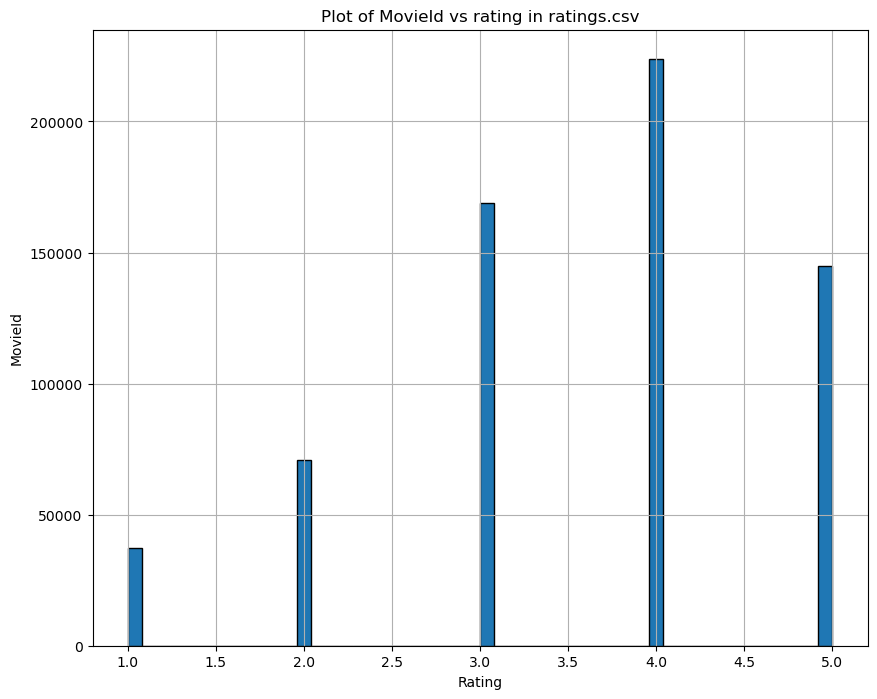

In [69]:
plt.figure(figsize=(10,8))
plt.rcParams['patch.force_edgecolor'] = True
ratings['rating'].hist(bins=50)
plt.ylabel('MovieId')
plt.xlabel('Rating')
plt.title('Plot of MovieId vs rating in ratings.csv')

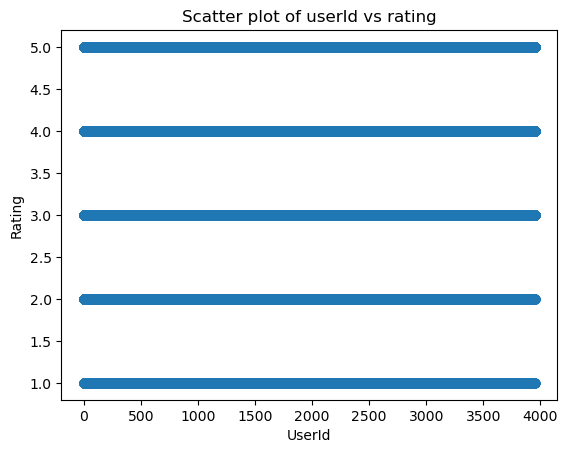

In [73]:
plt.scatter(ratings['userId'], ratings['rating'])
plt.xlabel('UserId')
plt.ylabel('Rating')
plt.title('Scatter plot of userId vs rating')
plt.show()

In [15]:
movies

,movieId,title,genre,new_movieId
0,1,Toy Story (1995),Animation|Children's|Comedy,0
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1
2,3,Grumpier Old Men (1995),Comedy|Romance,2
3,4,Waiting to Exhale (1995),Comedy|Drama,3
4,5,Father of the Bride Part II (1995),Comedy,4
...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,3878
3879,3949,Requiem for a Dream (2000),Drama,3879
3880,3950,Tigerland (2000),Drama,3880
3881,3951,Two Family House (2000),Drama,3881


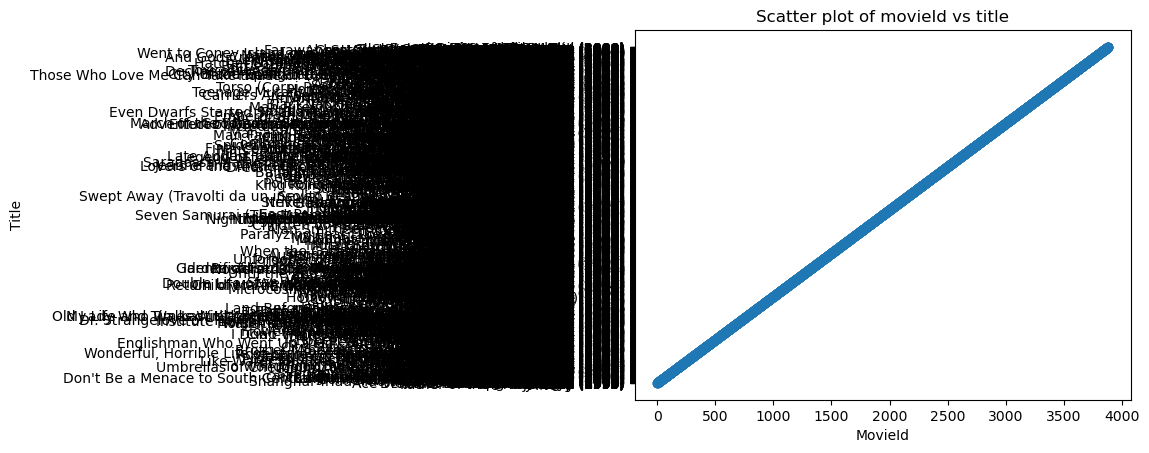

In [8]:
plt.scatter(movies['new_movieId'], movies['title'])
plt.xlabel('MovieId')
plt.ylabel('Title')
plt.title('Scatter plot of movieId vs title')
plt.show()

Merging both data with respect to movieId

In [16]:
ratings_with_name=ratings.merge(movies,on='movieId')

In [17]:
ratings_with_name

,movieId,userId,rating,timestamp,title,genre,new_movieId
0,1,1193,5,978300760,Toy Story (1995),Animation|Children's|Comedy,0
1,1,661,3,978302109,Toy Story (1995),Animation|Children's|Comedy,0
2,1,914,3,978301968,Toy Story (1995),Animation|Children's|Comedy,0
3,1,3408,4,978300275,Toy Story (1995),Animation|Children's|Comedy,0
4,1,2355,5,978824291,Toy Story (1995),Animation|Children's|Comedy,0
...,...,...,...,...,...,...,...
645828,3952,85,3,974595183,"Contender, The (2000)",Drama|Thriller,3882
645829,3952,2032,3,974595637,"Contender, The (2000)",Drama|Thriller,3882
645830,3952,1230,5,965676609,"Contender, The (2000)",Drama|Thriller,3882
645831,3952,2971,4,974594814,"Contender, The (2000)",Drama|Thriller,3882


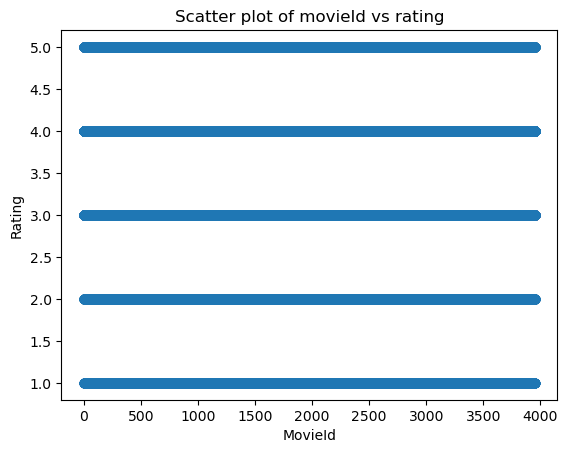

In [18]:
plt.scatter(ratings_with_name['movieId'], ratings_with_name['rating'])
plt.xlabel('MovieId')
plt.ylabel('Rating')
plt.title('Scatter plot of movieId vs rating')
plt.show()

Text(0.5, 1.0, 'Plot of UserId vs rating')

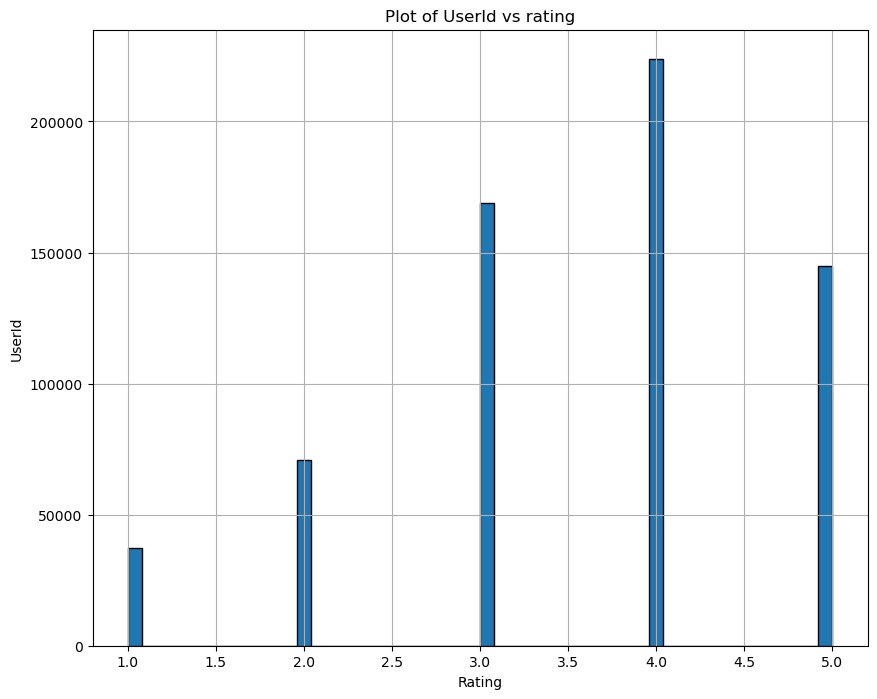

In [68]:
plt.figure(figsize=(10,8))
plt.rcParams['patch.force_edgecolor'] = True
ratings_with_name['rating'].hist(bins=50)
plt.ylabel('UserId')
plt.xlabel('Rating')
plt.title('Plot of UserId vs rating')

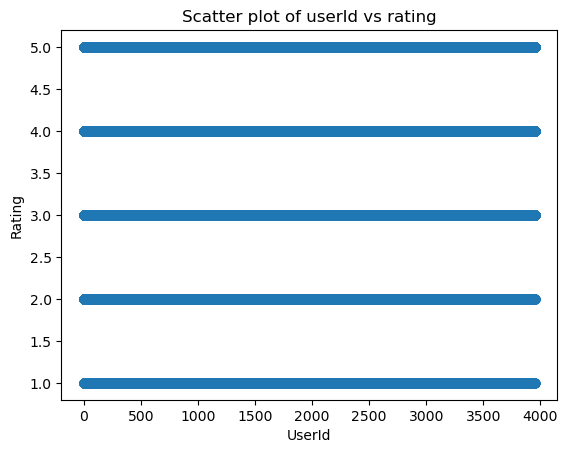

In [22]:
plt.scatter(ratings_with_name['userId'], ratings_with_name['rating'])
plt.xlabel('UserId')
plt.ylabel('Rating')
plt.title('Scatter plot of userId vs rating')
plt.show()

Creating pivot table

In [23]:

user_data = ratings_with_name.pivot_table(index = 'userId', columns = 'title', values = 'rating').fillna(0)
user_data

title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kjærlighetens kjøtere) (1995),Zeus and Roxanne (1997),Zone 39 (1997),eXistenZ (1999)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,4.0,4.0,5.0,5.0,5.0,...,5.0,0.0,4.0,3.0,0.0,0.0,0.0,4.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
3,0.0,0.0,0.0,3.0,0.0,2.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948,4.0,0.0,0.0,0.0,4.0,3.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3949,5.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
len(set.union(set(movies.title.to_list()),set(ratings_with_name.title.unique())))

3883

Splitting the train and test data.

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(user_data, test_size = 0.30, random_state = 42)
print(X_train.shape)
print(X_test.shape)


(2556, 3883)
(1096, 3883)


In [27]:
# make a copy of train and test datasets
dummy_train = X_train.copy()
dummy_test = X_test.copy()


In [29]:
dummy_train.head()

title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kjærlighetens kjøtere) (1995),Zeus and Roxanne (1997),Zone 39 (1997),eXistenZ (1999)
userId,,,,,,,,,,,,,,,,,,,,,
344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
1535,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2642,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
383,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
dummy_test.head()

title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kjærlighetens kjøtere) (1995),Zeus and Roxanne (1997),Zone 39 (1997),eXistenZ (1999)
userId,,,,,,,,,,,,,,,,,,,,,
1439,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1881,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
241,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2448,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
user_data.fillna(0,inplace=True)

In [33]:
user_data

title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kjærlighetens kjøtere) (1995),Zeus and Roxanne (1997),Zone 39 (1997),eXistenZ (1999)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,4.0,4.0,5.0,5.0,5.0,...,5.0,0.0,4.0,3.0,0.0,0.0,0.0,4.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
3,0.0,0.0,0.0,3.0,0.0,2.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948,4.0,0.0,0.0,0.0,4.0,3.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3949,5.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Finding cosine similarities between of user and movie baesd on training dataset and its transpose.

In [58]:
from sklearn.metrics.pairwise import cosine_similarity

# users Similarity Matrix using Cosine similarity as a similarity measure between Users
user_similarity = cosine_similarity(X_train)
user_similarity[np.isnan(user_similarity)] = 0
print(user_similarity)
print(user_similarity.shape)

# movie Similarity Matrix using Cosine similarity as a similarity measure between Users
movie_similarity = cosine_similarity(X_train.T)
movie_similarity[np.isnan(movie_similarity)] = 0
print(movie_similarity)
print(movie_similarity.shape)


[[1.         0.08301168 0.27899444 ... 0.14862877 0.10259056 0.06258872]
 [0.08301168 1.         0.09718121 ... 0.02469175 0.0481167  0.02169297]
 [0.27899444 0.09718121 1.         ... 0.18055931 0.12771563 0.05617503]
 ...
 [0.14862877 0.02469175 0.18055931 ... 1.         0.04425888 0.09370152]
 [0.10259056 0.0481167  0.12771563 ... 0.04425888 1.         0.        ]
 [0.06258872 0.02169297 0.05617503 ... 0.09370152 0.         1.        ]]
(2556, 2556)
[[1.         0.16606779 0.1442713  ... 0.22732196 0.15105002 0.12308563]
 [0.16606779 1.         0.16285758 ... 0.38110564 0.14955792 0.19342362]
 [0.1442713  0.16285758 1.         ... 0.11338712 0.00824786 0.02237234]
 ...
 [0.22732196 0.38110564 0.11338712 ... 1.         0.09132927 0.21917033]
 [0.15105002 0.14955792 0.00824786 ... 0.09132927 1.         0.04036461]
 [0.12308563 0.19342362 0.02237234 ... 0.21917033 0.04036461 1.        ]]
(3883, 3883)


# Collaborative Filtering

Implementing User based collaborative filtering

In [59]:
def get_top_similar_users(user_id, user_similarities, N):
    similar_users = user_similarities[user_id].argsort()[:-N-1:-1]
    return similar_users
def recommend_movies(user_id, user_similarities, pivot_table, N):
    similar_users = get_top_similar_users(user_id, user_similarities, N)
    similar_user_ratings = pivot_table.iloc[similar_users]
    avg_similar_user_ratings = similar_user_ratings.mean()
    user_ratings = pivot_table.loc[user_id]
    movies_to_recommend = user_ratings.index[user_ratings == 0]
    recommended_movie_scores = avg_similar_user_ratings[movies_to_recommend]
    recommended_movies = recommended_movie_scores.sort_values(ascending=False)[:N].index.tolist()
    return recommended_movies

# Example usage
user_id = 140
N = 10
recommended_movies = recommend_movies(user_id, user_similarity, user_data, N)
for i, recommendation in enumerate(recommended_movies):
    print(f"{i+1}. {recommendation}")


1. Heathers (1989)
2. Homeward Bound: The Incredible Journey (1993)
3. Mr. Death: The Rise and Fall of Fred A. Leuchter Jr. (1999)
4. Crooklyn (1994)
5. Blue Chips (1994)
6. Thirty-Two Short Films About Glenn Gould (1993)
7. For Ever Mozart (1996)
8. Breakfast of Champions (1999)
9. Abominable Snowman, The (1957)
10. Ice Storm, The (1997)


Implementing Item based collaborative filtering

In [60]:
# # movie_genre_mat = movie_genre_mat.to_numpy()
# movie_genre_mat.shape
# movie_genre_sim = cosine_similarity(movie_genre_mat)
# print(movie_genre_sim)
# print(movie_genre_sim.shape)

In [61]:
def recommend_movies(movie_title, num_recommendations=10):
    # Get the index of the given movie
    movie_index = movies[movies['title'] == movie_title].index[0]
    
    # Get the similarity scores of all other movies to the given movie
    similarity_scores = list(enumerate(movie_similarity[movie_index]))
    
    # Sort the movies by their similarity scores
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    
    # Get the indices of the top recommended movies
    top_indices = [i[0] for i in similarity_scores[1:num_recommendations+1]]
    
    # Return the titles of the top recommended movies
    return movies['title'].iloc[top_indices].values.tolist()

In [62]:
recommended_movies = recommend_movies('Bait (2000)', num_recommendations=10)
# print(recommended_movies)
for i, recommendation in enumerate(recommended_movies):
    print(f"{i+1}. {recommendation}")

1. Rich Man's Wife, The (1996)
2. Retro Puppetmaster (1999)
3. Striking Distance (1993)
4. Iron Eagle (1986)
5. In Dreams (1999)
6. Portraits Chinois (1996)
7. Herbie Goes Bananas (1980)
8. Billy's Holiday (1995)
9. Amityville II: The Possession (1982)
10. Forget Paris (1995)


# Evaluation
Evaluation will we same as you have seen above for the prediction. The only difference being, we will evaluate for the movie already rated by the User instead of predicting it for the movie not rated by the user.

# Using User-User similarity

In [43]:
test_user_similarity = cosine_similarity(X_test)
test_user_similarity[np.isnan(test_user_similarity)] = 0

print(test_user_similarity)
print("- "*10)
print(test_user_similarity.shape)

[[1.         0.05245543 0.02638752 ... 0.07613935 0.17024623 0.04262077]
 [0.05245543 1.         0.17084598 ... 0.18538823 0.08164882 0.05812797]
 [0.02638752 0.17084598 1.         ... 0.14836643 0.10222651 0.07377747]
 ...
 [0.07613935 0.18538823 0.14836643 ... 1.         0.09335909 0.18505494]
 [0.17024623 0.08164882 0.10222651 ... 0.09335909 1.         0.06342304]
 [0.04262077 0.05812797 0.07377747 ... 0.18505494 0.06342304 1.        ]]
- - - - - - - - - - 
(1096, 1096)


In [44]:
user_predicted_ratings_test = np.dot(test_user_similarity, X_test)
user_predicted_ratings_test

array([[ 16.6489984 ,  12.86399743,   3.71887992, ...,  32.99677092,
          3.00539507,   5.48420496],
       [ 18.33676796,  14.64232764,   3.3424778 , ...,  34.28678462,
          2.92295343,   6.0656718 ],
       [ 18.78738741,  13.39106877,   3.37455292, ...,  27.79313084,
          3.00756236,   5.3413364 ],
       ...,
       [ 54.22644702,  46.8127703 ,   9.7056758 , ..., 100.54627345,
         10.75436333,  16.195067  ],
       [ 10.32510892,   8.76789104,   2.39374971, ...,  22.18349734,
          1.81263448,   4.40110264],
       [ 43.74503614,  35.70881061,   9.23457295, ...,  78.51742861,
          9.27368293,  22.0342521 ]])

# Testing on the movies already rated by the user

In [45]:
test_user_final_rating = np.multiply(user_predicted_ratings_test, dummy_test)
test_user_final_rating.head()

title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kjærlighetens kjøtere) (1995),Zeus and Roxanne (1997),Zone 39 (1997),eXistenZ (1999)
userId,,,,,,,,,,,,,,,,,,,,,
1439,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1881,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
241,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3647,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2448,0.0,0.0,0.0,0.0,0.0,247.83121,0.0,0.0,0.0,312.355437,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
ratings['rating'].describe()

count    645833.000000
mean          3.570423
std           1.121767
min           1.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

But we need to normalize the final rating values between range (0.5, 5)

In [47]:
from sklearn.preprocessing import MinMaxScaler

X = test_user_final_rating.copy() 
X = X[X > 0] # only consider non-zero values as 0 means the user haven't rated the movies

scaler = MinMaxScaler(feature_range = (0.5, 5))
scaler.fit(X)
pred = scaler.transform(X)

print(pred)

[[       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 ...
 [       nan 2.20485937        nan ... 2.42046617        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ... 1.93852314        nan 3.07988289]]


In [48]:
# total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(pred))
total_non_nan

191937

In [51]:
test = X_test
test.head()

title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kjærlighetens kjøtere) (1995),Zeus and Roxanne (1997),Zone 39 (1997),eXistenZ (1999)
userId,,,,,,,,,,,,,,,,,,,,,
1439,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1881,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
241,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2448,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
# RMSE Score

diff_sqr_matrix = (test - pred)**2
sum_of_squares_err = diff_sqr_matrix.sum().sum() # df.sum().sum() by default ignores null values

rmse = np.sqrt(sum_of_squares_err/total_non_nan)
print(rmse)

1.1987548796794056


In [53]:
# Mean abslute error

mae = np.abs(pred - test).sum().sum()/total_non_nan
print(mae)

0.9711014584474741


It means that on an average our User-based recommendation engine is making an error of 0.97 in predicting the User ratings.

Now, let's evaluate Item-based recommendation engine.

# Using Item-Item Similarity

In [76]:
test_item_similarity = cosine_similarity(X_test.T)
test_item_similarity[np.isnan(test_item_similarity)] = 0 

print(test_item_similarity)
print("- "*10)
print(test_item_similarity.shape)

[[1.         0.1218917  0.25000519 ... 0.14804906 0.18856286 0.09555992]
 [0.1218917  1.         0.1185666  ... 0.3433852  0.10332464 0.08441946]
 [0.25000519 0.1185666  1.         ... 0.06651446 0.11042321 0.05364386]
 ...
 [0.14804906 0.3433852  0.06651446 ... 1.         0.13969077 0.17146977]
 [0.18856286 0.10332464 0.11042321 ... 0.13969077 1.         0.04367853]
 [0.09555992 0.08441946 0.05364386 ... 0.17146977 0.04367853 1.        ]]
- - - - - - - - - - 
(3883, 3883)


In [80]:
item_predicted_ratings_test = np.dot(X_test, test_item_similarity )
item_predicted_ratings_test

array([[ 12.66482435,  14.47563066,   8.8260713 , ...,  25.21839362,
          7.21156697,   8.72722275],
       [ 21.23906325,  23.00113381,  12.69896151, ...,  40.04154111,
         12.33622418,  13.58980756],
       [ 11.20167323,  13.05100766,   6.92217314, ...,  19.29243262,
          6.69390645,   7.10485668],
       ...,
       [264.7093035 , 327.1423318 , 152.34430313, ..., 496.77419501,
        166.8133138 , 159.48645852],
       [  6.24922566,   8.48196806,   4.0286445 , ...,  13.81357342,
          4.12395476,   5.29045128],
       [272.16211821, 327.13768942, 182.44727041, ..., 487.36791755,
        184.99887213, 297.11191209]])

# Testing on the movies already rated by the user

In [81]:
test_item_final_rating = np.multiply(item_predicted_ratings_test, dummy_test)
test_item_final_rating.head()

title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kjærlighetens kjøtere) (1995),Zeus and Roxanne (1997),Zone 39 (1997),eXistenZ (1999)
userId,,,,,,,,,,,,,,,,,,,,,
1439,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1881,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
241,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3647,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2448,0.0,0.0,0.0,0.0,0.0,174.62743,0.0,0.0,0.0,261.229038,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
ratings['rating'].describe()

count    645833.000000
mean          3.570423
std           1.121767
min           1.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [83]:
from sklearn.preprocessing import MinMaxScaler

X = test_item_final_rating.copy() 
X = X[X > 0] # only consider non-zero values as 0 means the user haven't rated the movies

scaler = MinMaxScaler(feature_range = (0.5, 5))
scaler.fit(X)
pred = scaler.transform(X)

print(pred)

[[       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 ...
 [       nan 1.03978555        nan ... 1.1217741         nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ... 1.1093281         nan 1.40969735]]


In [84]:
# total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(pred))
total_non_nan

191937

In [85]:
test = X_test
test.head()

title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kjærlighetens kjøtere) (1995),Zeus and Roxanne (1997),Zone 39 (1997),eXistenZ (1999)
userId,,,,,,,,,,,,,,,,,,,,,
1439,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1881,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
241,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2448,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
# RMSE Score

diff_sqr_matrix = (test - pred)**2
sum_of_squares_err = diff_sqr_matrix.sum().sum() # df.sum().sum() by default ignores null values

rmse = np.sqrt(sum_of_squares_err/total_non_nan)
print(rmse)

2.267517807696574


In [87]:
# Mean abslute error

mae = np.abs(pred - test).sum().sum()/total_non_nan
print(mae)

2.0082235468522036


It means that on an average our Item-based recommendation engine is making an error of 2.008 in predicting the User ratings.

# Conclusion

For the give dataset, the User-based collaborative filtering outperformed Item-based collaborative filtering.